In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [3]:
df= pd.read_csv('portland-oregon-average-monthly-.csv')

In [4]:
df.head()

,Month,"Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114"
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
 #   Column                                                                                      Non-Null Count  Dtype 
---  ------                                                                                      --------------  ----- 
 0   Month                                                                                       115 non-null    object
 1   Portland Oregon average monthly bus ridership (/100) January 1973 through June 1982, n=114  115 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [9]:
df.columns=['month','avg ridership']
df.head()

,month,avg ridership
0,1960-01,648
1,1960-02,646
2,1960-03,639
3,1960-04,654
4,1960-05,630


In [11]:
df['avg ridership'].unique()

array(['648', '646', '639', '654', '630', '622', '617', '613', '661',
       '695', '690', '707', '817', '839', '810', '789', '760', '724',
       '704', '691', '745', '803', '780', '761', '857', '907', '873',
       '910', '900', '880', '867', '854', '928', '1064', '1103', '1026',
       '1102', '1080', '1034', '1083', '1078', '1020', '984', '952',
       '1033', '1114', '1160', '1058', '1209', '1200', '1130', '1182',
       '1152', '1116', '1098', '1044', '1142', '1222', '1234', '1155',
       '1286', '1281', '1224', '1280', '1228', '1181', '1156', '1124',
       '1205', '1260', '1188', '1212', '1269', '1246', '1299', '1284',
       '1345', '1341', '1308', '1448', '1454', '1467', '1431', '1510',
       '1558', '1536', '1523', '1492', '1437', '1365', '1310', '1441',
       '1450', '1424', '1360', '1429', '1440', '1414', '1408', '1337',
       '1258', '1214', '1326', '1417', '1329', '1461', '1425', '1419',
       '1432', '1394', '1327', ' n=114'], dtype=object)

In [18]:
df = df.drop(df.index[df['avg ridership']==' n=114'])

#### Converting data

In [19]:
df['avg ridership']= df['avg ridership'].astype(int)

In [20]:
df['month']= pd.to_datetime(df['month'],format='%Y-%m')

In [21]:
df.dtypes

month            datetime64[ns]
avg ridership             int32
dtype: object

In [22]:
df.head()

,month,avg ridership
0,1960-01-01,648
1,1960-02-01,646
2,1960-03-01,639
3,1960-04-01,654
4,1960-05-01,630


In [23]:
df_copy = df.copy()

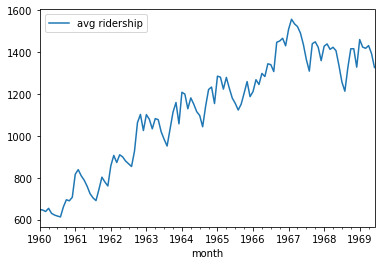

In [25]:
df_copy.plot(x='month',y='avg ridership')
plt.show()

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose


<ipython-input-29-c561bcaf5f1e>:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decompose= seasonal_decompose(df_copy['avg ridership'],


<Figure size 432x288 with 0 Axes>

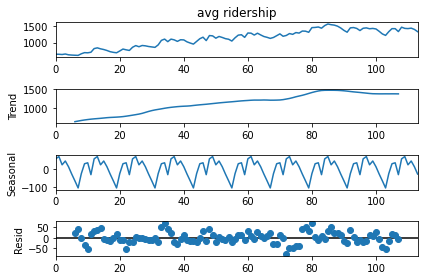

In [29]:
decompose= seasonal_decompose(df_copy['avg ridership'],
                             freq=12)

fig = plt.figure()
fig = decompose.plot()

In [30]:
df_copy['avg_forecast'] = df_copy['avg ridership'].mean()

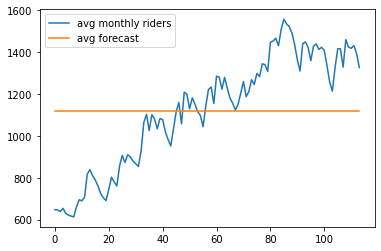

In [31]:
plt.plot(df_copy['avg ridership'], label='avg monthly riders')
plt.plot(df_copy['avg_forecast'],label= 'avg forecast')
plt.legend(loc='best')

In [32]:
df_copy['moving_avg']= df_copy['avg ridership'].rolling(3, min_periods=1).mean()     

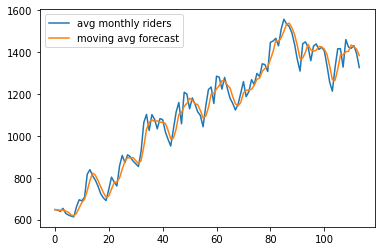

In [33]:
plt.plot(df_copy['avg ridership'], label='avg monthly riders')
plt.plot(df_copy['moving_avg'],label= 'moving avg forecast')
plt.legend(loc='best')

In [34]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

In [35]:
model = SimpleExpSmoothing(np.asarray(df_copy['avg ridership'])).fit(smoothing_level=0.8)


C:\Users\tsharmili\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [36]:
df_copy['SES'] = model.forecast(len(df_copy))

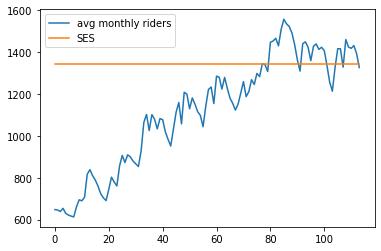

In [37]:
plt.plot(df_copy['avg ridership'], label='avg monthly riders')
plt.plot(df_copy['SES'],label= 'SES')
plt.legend(loc='best')

In [38]:
from statsmodels.tsa.api import Holt 

In [39]:
model2 = Holt(np.asarray(df_copy['avg ridership'])).fit(smoothing_level=0.3,smoothing_slope=0.01)


C:\Users\tsharmili\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-39-b65c0423a9d5>:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  model2 = Holt(np.asarray(df_copy['avg ridership'])).fit(smoothing_level=0.3,smoothing_slope=0.01)


In [40]:
df_copy['Holt_Linear'] = model2.forecast(len(df_copy))

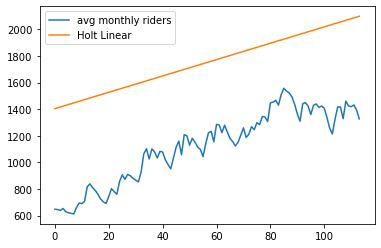

In [41]:
plt.plot(df_copy['avg ridership'], label='avg monthly riders')
plt.plot(df_copy['Holt_Linear'],label= 'Holt Linear')
plt.legend(loc='best')

In [42]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [46]:
model3 = ExponentialSmoothing(np.array(df_copy['avg ridership']),
                             seasonal_periods =12,
                             trend='add',
                             seasonal='add').fit()

C:\Users\tsharmili\Anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [47]:
df_copy['Holt_Winter'] = model3.forecast(len(df_copy))

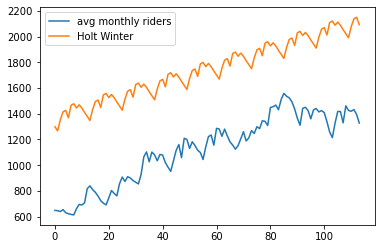

In [48]:
plt.plot(df_copy['avg ridership'], label='avg monthly riders')
plt.plot(df_copy['Holt_Winter'],label= 'Holt Winter')
plt.legend(loc='best')